## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [39]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

def calibrate(nx=9, ny=6, debug=False):
    objp = np.zeros((nx * ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob('./camera_cal/calibration*.jpg')
    
    # Step through the list and search for chessboard corners
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        if not ret: continue

        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        objpoints.append(objp)
        imgpoints.append(corners)
        
        if debug:
            plt.imshow(img)
            plt.show()
                
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    dist_pickle = { "mtx": mtx, "dist": dist }

    with open("wide_dist_pickle.p", "wb") as f:
        pickle.dump(dist_pickle, f)

    if debug:
        for fname in images:
            img = cv2.imread(fname)
            plt.imshow(cv2.undistort(img, mtx, dist, None, mtx))
            plt.show()
            
    return mtx, dist

mtx, dist = calibrate()

## And so on and so forth...

In [ ]:
def convert_hls(img):
    return cv2.cvtColor(img.COLOR_RGB2HLS)

def filter_color(img, upper, lower):
    return cv2.inRange(img, upper, lower)

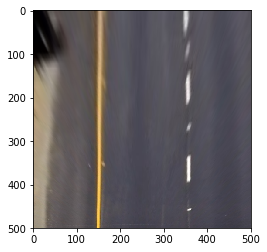

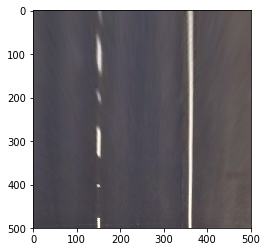

In [35]:
def warp(fname, mtx, dist, display=False):
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    
    w = undistorted.shape[1]
    h = undistorted.shape[0]
    warped_size = 500
    src = np.float32([[527, 450],[w-529, 450], [w, 600],[0, 600]])
    dst = np.float32([[0, 0], [warped_size, 0], [warped_size, warped_size],[0, warped_size]])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undistorted, M, (warped_size, warped_size))
    if display:
        plt.imshow(warped)
        plt.show()
        
    return warped
    
warped = warp('./test_images/straight_lines1.jpg', mtx, dist, True)
warped = warp('./test_images/straight_lines2.jpg', mtx, dist, True)

In [33]:


hls = convert_hls()

In [38]:
import os

files = os.listdir("test_images/")
plt.figure(figsize=(25, 20))
for i, file in enumerate(files):
    image = cv2.imread("test_images/{}".format(file))
    plt.subplot(3, 2, i + 1)
    plt.title(file)
    plt.imshow(combo)
    cv2.imwrite("test_images_output/{}".format(file), cv2.cvtColor(combo, cv2.COLOR_RGB2BGR))

NameError: name 'find_lane' is not defined

<Figure size 1800x1440 with 0 Axes>